In [8]:
!pip install nltk
!pip install simple-elmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.8 MB/s eta 0:00:00


In [3]:
import nltk
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to /root/nltk_data...
[nltk_data]   Unzipping models/word2vec_sample.zip.


True

In [4]:
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))

In [6]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [12]:
from simple_elmo import ElmoModel

model = ElmoModel()
model.load('drive/MyDrive/194.zip')

/usr/local/lib/python3.10/dist-packages/simple_elmo/model.py:531: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  lstm_cell = tf.compat.v1.nn.rnn_cell.LSTMCell(


'The model is now loaded.'

In [23]:
import csv
import json

def get_additional_memo(csv_line: list[str]) -> str:
  """
  Checks the check, donation, invoice, and transfer memo for any additional memo

  Returns an empty string if all of those are also empty
  """
  if csv_line[6] != '':
    return csv_line[6]

  if csv_line[7] != '':
    return csv_line[7]

  if csv_line[8] != '':
    return csv_line[8]

  if csv_line[9] != '':
    return csv_line[9]

def get_dataset():
  """
  Reads the CSV file and parses all of them into an array of dictionaries
  """

  data = []
  with open('drive/MyDrive/transactions3.csv', mode ='r')as file:
    csvFile = csv.reader(file)
    first = True
    for line in csvFile:
      if first:
        first = False
        continue
      try:
        data.append({
          "amount_cents": line[0],
          "memo": line[1],
          "date": line[2],
          "type": line[3],
          "tags": json.loads(line[4].replace("'", '"').replace('✈️\\xa0', '🛫')),
          "org_category": line[4],
          "org_id": line[5],
          "additional_memo": get_additional_memo(line)
        })
      except:
        print(line)

  return data

In [25]:
data = get_dataset()

memo_embeddings = model.get_elmo_vector_average([transaction["memo"] for transaction in data])

In [ ]:
with open('embeddings.csv', 'w') as file:
  for embedding in memo_embeddings:
    file.write(','.join([str(i) for i in embedding]) + '\n')

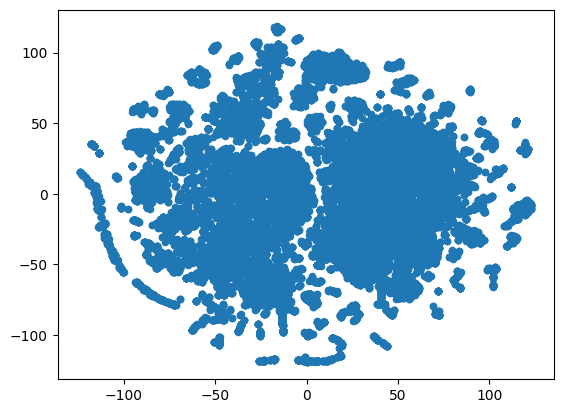

In [37]:
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

# Show the scatter plot
import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1], 20)

plt.show()

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_10 = pca.fit_transform(memo_embeddings)

from sklearn.cluster import OPTICS

clustering10 = OPTICS(min_samples=10).fit(X_10)

In [43]:
print(list(set(clustering10.labels_)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

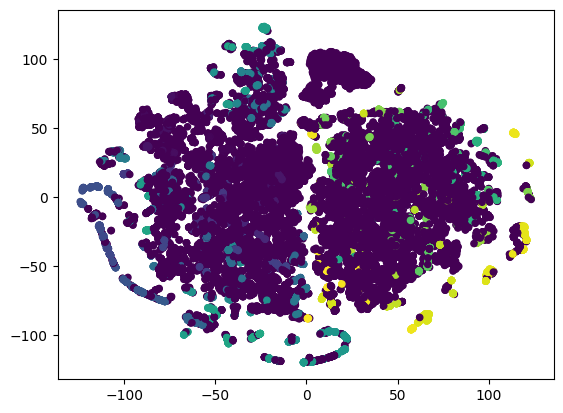

In [46]:
from sklearn.manifold import TSNE
max_label = max(clustering10.labels_)
labels = [(label + 1) / (max_label + 1) * 100 for label in clustering10.labels_]
model_tsne = TSNE(n_components=2, random_state=0)
Y10 = model_tsne.fit_transform(X_10)

# Show the scatter plot
import matplotlib.pyplot as plt
plt.scatter(Y10[:,0], Y10[:,1], 20, c=labels)

plt.show()

(array([17669.,   699.,   748.,   650.,   658.,   758.,   776.,   750.,
          665.,   845.]),
 array([ -1. ,  39.8,  80.6, 121.4, 162.2, 203. , 243.8, 284.6, 325.4,
        366.2, 407. ]),
 <BarContainer object of 10 artists>)

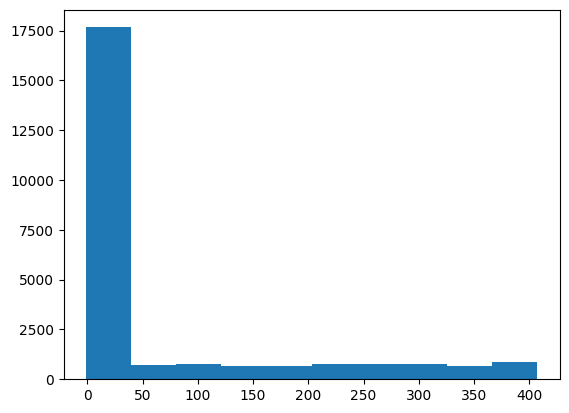

In [47]:
plt.hist(clustering10.labels_)

In [55]:
from sklearn.cluster import MiniBatchKMeans

kmeans50 = MiniBatchKMeans(n_clusters=50,
                         random_state=0,
                         batch_size=6,
                         max_iter=10,
                         n_init="auto").fit(X_10)

kmeans100 = MiniBatchKMeans(n_clusters=100,
                         random_state=0,
                         batch_size=6,
                         max_iter=10,
                         n_init="auto").fit(X_10)

kmeans10 = MiniBatchKMeans(n_clusters=10,
                         random_state=0,
                         batch_size=6,
                         max_iter=10,
                         n_init="auto").fit(X_10)

KeyboardInterrupt: 

In [56]:
kmeans200 = MiniBatchKMeans(n_clusters=200,
                         random_state=0,
                         batch_size=6,
                         max_iter=10,
                         n_init="auto").fit(X_10)

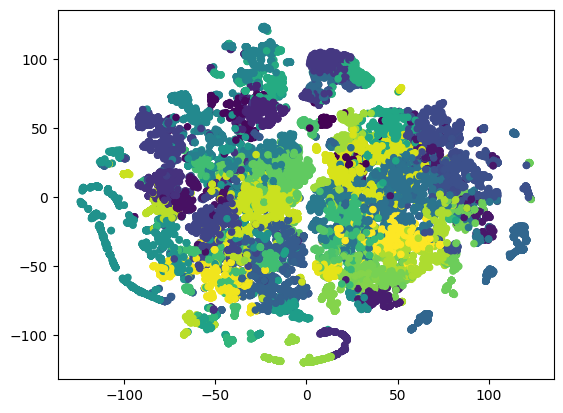

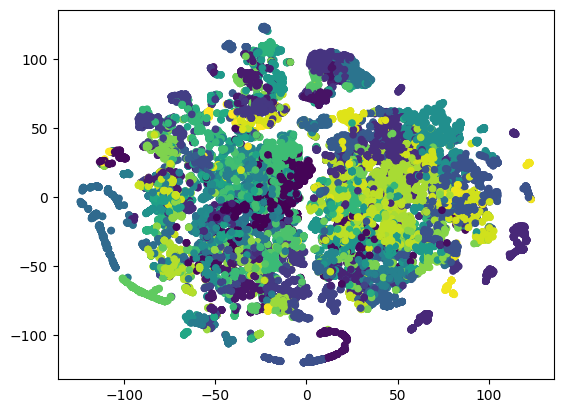

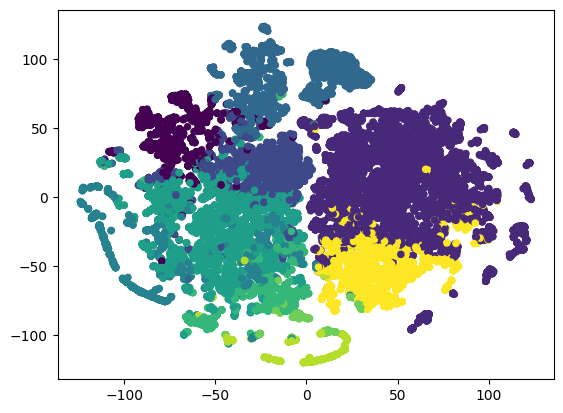

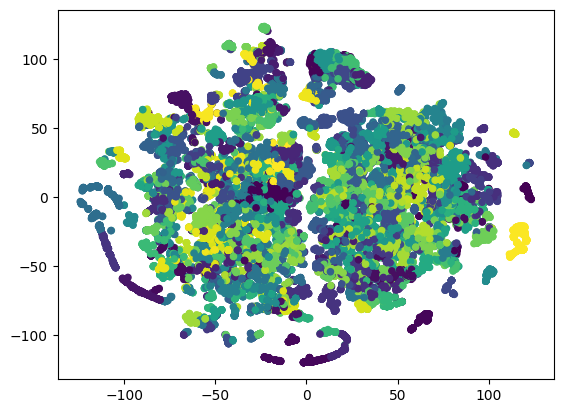

In [59]:
max_label = max(kmeans50.labels_)
plt.scatter(Y10[:,0], Y10[:,1], 20, c=[label / max_label * 100 for label in kmeans50.labels_])
plt.show()

max_label = max(kmeans100.labels_)
plt.scatter(Y10[:,0], Y10[:,1], 20, c=[label / max_label * 100 for label in kmeans100.labels_])
plt.show()

max_label = max(kmeans10.labels_)
plt.scatter(Y10[:,0], Y10[:,1], 20, c=[label / max_label * 100 for label in kmeans10.labels_])
plt.show()

max_label = max(kmeans200.labels_)
plt.scatter(Y10[:,0], Y10[:,1], 20, c=[label / max_label * 100 for label in kmeans200.labels_])
plt.show()

In [58]:
def find_examples(dataset, labels, target_label, count):
  num = 0
  i = 0
  while num < count and i < len(labels):
    if labels[i] == target_label:
      print(dataset[i]["memo"])
      num += 1
    i += 1

for i in range(max(kmeans50.labels_)):
  print("\n~~~\nExamples of", i)
  find_examples(data, kmeans50.labels_, i, 10)


~~~
Examples of 0
1,000 HCB flyers for FIRST regionals and FIRST world championship
Transfer to Hack Club Reserve: 10% of December 2023 Donation
Transfer to Hack Club Reserve: 10% of November 2023 Donation
100 additional each Sprig and OnBoard 11x17" posters (200 total)
→ Transfer to Hack Club Reserve: 10% of September 2023 Donations
→ Transfer to Hack Club Reserve: 10% of October 2023 Donations
November 2023 living expenses
Lodging + workspace for August 2023-2024 planning retreat
Accidental Hotel Charge (repaid)
biBerk 2021-2022 Worker's comp. premium payment (audit)

~~~
Examples of 1
99 RANCH MARKET #12
99 RANCH MARKET #12
WIRE OUT 210920321700 202109203217;BNF SHAHEEN IQBAL;OBI GRANT TO BENEFICIARY
FISCAL SPONSORSHIP (NEW) - 7027
FISCAL SPONSORSHIP (NEW) - 7027
FISCAL SPONSORSHIP (NEW) - 7027
FISCAL SPONSORSHIP (NEW) - 7027
FISCAL SPONSORSHIP (NEW) - 7027
MAHACKS V: PANERA BREAD #203431 K
FISCAL SPONSORSHIP (NEW) - 7027

~~~
Examples of 2
EMBURSE MIGRATION 💸 FROM EMBURSE CLEARING